In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 50% !important;}</style>" 
HTML(style)
from sklearn.model_selection import train_test_split

In [2]:
#Берем файл со всеми дескрипторами (Из той папки, где код)
data = pd.read_excel('C://Users//plato//Documents//Python Scripts//Toluene_final//Toluene_ALL.xlsx', index_col=0) 

In [3]:
merged_df = data[['ATSC4e', 'nTB:(Dragon7)', 'CATS2D_04_PL', 'F10[C-N]', 'IVDE', 'Eig03_EA(dm)', 'TDB01e', 'LnLn']]

In [4]:
#Сохраняем в отдельный файл (он сохранится в ту папку, в которой этот код)
merged_df.to_excel(f'Toluene_RFR.xlsx', index=True)

In [5]:
#Загружаем наш сохраненный файл
BDP_data = pd.read_excel('C://Users//plato//Documents//Python Scripts//Toluene_final//Toluene_RFR.xlsx', index_col=0) 
BDP_data.head()

,ATSC4e,nTB:(Dragon7),CATS2D_04_PL,F10[C-N],IVDE,Eig03_EA(dm),TDB01e,LnLn
SrNo,,,,,,,,
1,0.4766,0,2,0,1.689,0.0,1.352,0.111176
2,0.2636,0,3,0,1.711,0.0,1.303,0.107657
21,0.2131,0,5,0,1.698,0.0,1.296,0.083064
26,0.3993,0,5,0,1.686,0.0,1.320,0.046121
27,0.2332,0,5,0,1.660,0.0,1.296,0.026888


<Axes: xlabel='LnLn'>

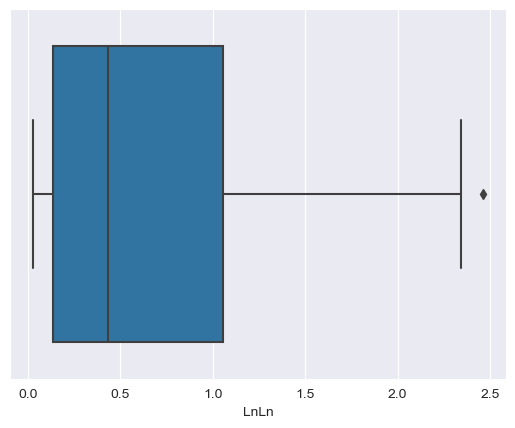

In [6]:
sns.boxplot(x = BDP_data['LnLn'])

In [7]:
# Create correlation matrix
# Берем абсолютные значения, тк чем ближе к 0, тем меньше корелляция
corr_matrix = BDP_data.corr().abs()
corr_matrix.head

<bound method NDFrame.head of                  ATSC4e  nTB:(Dragon7)  CATS2D_04_PL  F10[C-N]      IVDE  \
ATSC4e         1.000000       0.253142      0.365506  0.453801  0.322862   
nTB:(Dragon7)  0.253142       1.000000      0.111515  0.334777  0.070895   
CATS2D_04_PL   0.365506       0.111515      1.000000  0.294618  0.005177   
F10[C-N]       0.453801       0.334777      0.294618  1.000000  0.106716   
IVDE           0.322862       0.070895      0.005177  0.106716  1.000000   
Eig03_EA(dm)   0.358546       0.268306      0.025689  0.421336  0.118418   
TDB01e         0.186689       0.107698      0.377339  0.175208  0.102040   
LnLn           0.194476       0.129929      0.042363  0.021312  0.480209   

               Eig03_EA(dm)    TDB01e      LnLn  
ATSC4e             0.358546  0.186689  0.194476  
nTB:(Dragon7)      0.268306  0.107698  0.129929  
CATS2D_04_PL       0.025689  0.377339  0.042363  
F10[C-N]           0.421336  0.175208  0.021312  
IVDE               0.118418  0.1020

In [8]:
#Убираем дескрипторы с высокой корелляцией( это хорошо для лин регрессии, а в рф потеря информации)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
# Drop features 
BDP_data1 = BDP_data.drop(BDP_data[to_drop], axis=1)

In [9]:
BDP_data1

,ATSC4e,nTB:(Dragon7),CATS2D_04_PL,F10[C-N],IVDE,Eig03_EA(dm),TDB01e,LnLn
SrNo,,,,,,,,
1,0.4766,0,2,0,1.689,0.0000,1.352,0.111176
2,0.2636,0,3,0,1.711,0.0000,1.303,0.107657
21,0.2131,0,5,0,1.698,0.0000,1.296,0.083064
26,0.3993,0,5,0,1.686,0.0000,1.320,0.046121
27,0.2332,0,5,0,1.660,0.0000,1.296,0.026888
28,0.2635,0,5,2,1.613,0.0000,1.292,0.091515
29,0.2519,0,7,0,1.613,0.0000,1.292,0.585054
30,0.2564,0,7,3,1.613,0.0000,1.292,0.393019
31,0.2284,0,5,0,1.630,0.0000,1.301,0.075947


In [10]:
#разделяем на целевую переменную и дескрипторы
y = BDP_data1.LnLn
X = BDP_data1.drop(['LnLn'], axis=1)
#делаем тренировочную выборку
X_train = X.drop([31, 2, 70, 57, 47, 39, 42, 66, 53], axis=0)
#делаем тренировочную целевую переменную
y_train = y.drop([31, 2, 70, 57, 47, 39, 42, 66, 53], axis=0)
#делаем тестовую выборку
X_test = X.loc[[31, 2, 70, 57, 47, 39, 42, 66, 53]]
#делаем тестовую целевую переменную
y_test = y.loc[[31, 2, 70, 57, 47, 39, 42, 66, 53]]

In [11]:
#Обучаем случайный лес чтобы получить наилучшие параметры !главное не запустить случайно, долго делается!
#train_r2 = 0.0
#test_r2 = 0.0

#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import make_scorer, r2_score
#import numpy as np

# Предположим, что X и y уже определены
# Задаем модель случайного леса
#rf_regressor = RandomForestRegressor()

# Задаем сетку параметров для поиска
#param_grid = {
#    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': [1.0, 'sqrt', 'log2']
#}

# Задаем метрику для оценки качества модели
#scorer = make_scorer(r2_score)

# Инициируем объект GridSearchCV
#grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Выполняем поиск наилучшиххх параметров
#grid_search.fit(X_train, y_train)

# Получаем наилучшие параметры
#best_params = grid_search.best_params_

# Инициируем и обучаем модель с наилучшими параметрами
#best_rf_regressor = RandomForestRegressor(**best_params)
#best_rf_regressor.fit(X_train, y_train)

# Оцениваем качество модели на тестовой выборке
#y_pred = best_rf_regressor.predict(X_test)
#r2 = r2_score(y_test, y_pred)

#print("Best parameters:", best_params)
# Вычисляем коэффициенты детерминации для тренировочной и тестовой выборок
#y_train_pred = best_rf_regressor.predict(X_train)
#train_r2 = r2_score(y_train, y_train_pred)
#y_test_pred = best_rf_regressor.predict(X_test)
#test_r2 = r2_score(y_test, y_test_pred)
# Выводим текущие значения коэффициентов детерминации
#print("Train R^2:", train_r2)
#print("Test R^2:", test_r2)

In [12]:
#сохранить модель
#import joblib
#joblib.dump(best_rf_regressor, "best_rf_regressor_RF_toluene_Ln_R2test_06185443489961151_17_04_3")

In [13]:
#train_r2 = 0.0
#test_r2 = 0.0
# Обучаем случайный лес на лучших параметрах пока R2 не станут классными
#while train_r2 <= 0.8 or test_r2 <= 0.9:
    # Задаем модель случайного леса
#    rf_regressor = RandomForestRegressor()    
    # Создаем и обучаем модель случайного леса
#    parameters = {
#    'n_estimators': [2],
#    'max_depth': [4],
#    'min_samples_split': [5],
#    'min_samples_leaf': [1],
#    'max_features': [1.0]}
    # Задаем метрику для оценки качества модели
#    scorer = make_scorer(r2_score)
    # Инициируем объект GridSearchCV
#    grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameters, scoring=scorer, cv=5, n_jobs=-1)
#    grid_search.fit(X_train, y_train)
    # Вычисляем коэффициенты детерминации для тренировочной и тестовой выборок
#    y_train_pred = grid_search.predict(X_train)
#    train_r2 = r2_score(y_train, y_train_pred)
#    y_test_pred = grid_search.predict(X_test)
#    test_r2 = r2_score(y_test, y_test_pred)
# Выводим текущие значения коэффициентов детерминации
#print("Train R^2:", train_r2)
#print("Test R^2:", test_r2)

In [14]:
#сохранить модель
#import joblib
#joblib.dump(grid_search, "RFR_toluene_LnLn_R2test_09114488954627812_17_04_3")

In [15]:
import sklearn
print(sklearn.__version__)

1.2.1


In [16]:
#загрузить модель из той же папки, где код
import joblib
loaded_rf = joblib.load("RFR_toluene_LnLn_R2test_09114488954627812_17_04_3")

In [17]:
from sklearn.metrics import make_scorer, r2_score
y_train_pred = loaded_rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
y_test_pred = loaded_rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R^2 loaded:", train_r2)
print("Test R^2 loaded:", test_r2)

Train R^2 loaded: 0.8386340474648809
Test R^2 loaded: 0.9114488954627812


In [18]:
import sklearn.metrics as metrics
metrics.mean_squared_error(y_train, y_train_pred) #Mean squared error regression loss
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE_train: {rmse_train}")
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE_test: {rmse_test}")

RMSE_train: 0.3037889323330223
RMSE_test: 0.2126111756232934


In [19]:
R2_adj = 1 - ( 1-train_r2 ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print("R^2 adjusted:", R2_adj)

R^2 adjusted: 0.7982925593311011


In [20]:
#Максимальная ошибка предсказания
import sklearn.metrics as metrics
MaxAE = metrics.max_error(y_train, y_train_pred)  #max_error metric calculates the maximum residual error
print(f"MaxAE: {MaxAE}")
#Средняя абсолютная ошибка предсказания
MAE = metrics.mean_absolute_error(y_train, y_train_pred) #Mean absolute error regression loss
print(f"MAE: {MAE}")

MaxAE: 0.8900837425502814
MAE: 0.21901373735152385


In [21]:
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [22]:
mape_train = calculate_mape(y_train, y_train_pred)
mape_test = calculate_mape(y_test, y_test_pred)
print(f"MAPE for the training dataset: {mape_train}")
print(f"MAPE for the test dataset: {mape_test}")

MAPE for the training dataset: 143.8768372498577
MAPE for the test dataset: 64.23514948944903


In [23]:
# наилучшие параметры загруженного RF
loaded_rf.best_params_

{'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 2}

In [24]:
#Считаем важность дескрипторов
best_rf_model = loaded_rf.best_estimator_
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score
import numpy as np
#создаем веса для дескрипторов (важность каждого дескриптора)
feature_importances = best_rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'features': X_test.columns.values,
                                  'feature_importances':feature_importances})
importances = feature_importances_df.sort_values('feature_importances', ascending=False)
importances

,features,feature_importances
0,ATSC4e,0.343823
5,Eig03_EA(dm),0.306054
6,TDB01e,0.209379
4,IVDE,0.105003
3,F10[C-N],0.023712
2,CATS2D_04_PL,0.012028
1,nTB:(Dragon7),0.000000


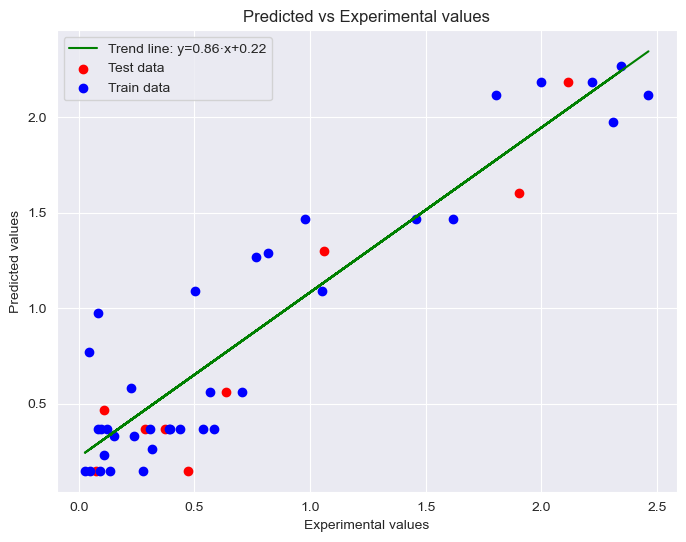

intercept: 0.22036543598380612
slope: 0.8620519740157591


In [25]:
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации
slope, intercept = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.86·x+0.22')
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.scatter(y_train, y_train_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()

print(f"intercept: {intercept}")
print(f"slope: {slope}")

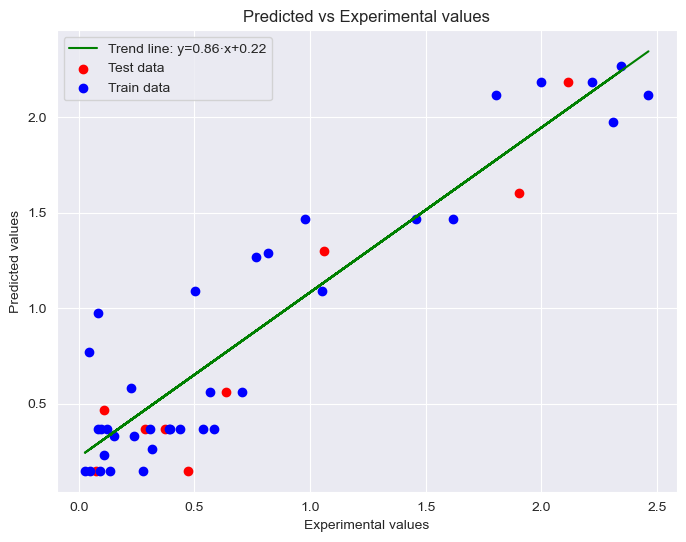

In [26]:
#Сохраняет в PDF в высоком качестве
import matplotlib.pyplot as plt

# Строим график
plt.figure(figsize=(8, 6))
# Выполнение линейной аппроксимации
slope, intercept = np.polyfit(y_train, y_train_pred, 1)
plt.plot(y_train, slope * y_train + intercept, color='green', label='Trend line: y=0.86·x+0.22')
plt.scatter(y_test, y_test_pred, color='red', label='Test data')
plt.scatter(y_train, y_train_pred, color='blue', label='Train data')
plt.title('Predicted vs Experimental values')
plt.xlabel('Experimental values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)

# Сохранение графика в PDF
plt.savefig('Toluene_RFR_graph.pdf')

# Отображение графика (необязательно)
plt.show()

In [27]:
#Считаем q2 следующим образом: делаем цикл, пока q2 не станет больше 0,5 при этом постоянно сохраняем лучший q2 и выводим его если изменилось значение максимума
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import make_scorer, r2_score
#from sklearn.metrics import r2_score as r2
#r2_score = 0
#q2 = 0
# Предполагается, что X_train и y_train уже определены и предобработаны
#while r2_score <= 0.5:
    # Создаем пустой датафрейм для предсказаний
 #   y_predict = pd.DataFrame(columns=['Predicted'])

    # Цикл для исключения одного элемента и обучения модели
  #  for index_to_exclude in X_train.index:
            # Создаем новую выборку, исключая текущий элемент
   #         X_train_subset = X_train.drop([index_to_exclude], axis=0)
    #        y_train_subset = y_train.drop([index_to_exclude], axis=0)
     #       X_solo = X_train.loc[[index_to_exclude]]
      #      parameters = {'n_estimators': [2], 'max_depth': [4], 'min_samples_split': [5], 'min_samples_leaf': [1], 'max_features': [1.0]}
       #     rfr = RandomForestRegressor()
        #    grid_search = GridSearchCV(estimator=rfr, param_grid=parameters, cv=None)
            # Обучаем модель на подвыборке
         #   grid_search.fit(X_train_subset, y_train_subset)
            # Предсказываем значение для исключенного элемента
          #  y_pred = grid_search.predict(X_solo)
            # Добавляем предсказание в датафрейм
#           # y_predict.loc[index_to_exclude] = y_pred
#    r2_score = r2(y_train, y_predict)
#    r2_score
#    if r2_score > q2:
#        q2 = r2_score
#        print('q2 =', q2)

In [28]:
#q2

In [29]:
loaded_rf

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4], 'max_features': [1.0],
                         'min_samples_leaf': [1], 'min_samples_split': [5],
                         'n_estimators': [2]},
             scoring=make_scorer(r2_score))

In [30]:
feature_names = BDP_data1.columns.values[:-1]

In [31]:
feature_names 

array(['ATSC4e', 'nTB:(Dragon7)', 'CATS2D_04_PL', 'F10[C-N]', 'IVDE',
       'Eig03_EA(dm)', 'TDB01e'], dtype=object)

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale

In [33]:
rf_ale = ALE(loaded_rf.predict, feature_names=feature_names, target_names=['LnLn'])

In [34]:
X_train1 = X_train.to_numpy()

In [35]:
rf_exp = rf_ale.explain(X_train1)

C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\plato\anaconda3\Lib\site-packages\sklearn\base.py:420: U

In [51]:
plot_ale(rf_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});

# Сохранение графика в PDF
plt.savefig('Toluene_RFR_ale_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()

In [37]:
best_estimator = loaded_rf.best_estimator_
feature_importances = best_estimator.feature_importances_
max_importance_index = feature_importances.argmax()
most_important_feature = feature_names[max_importance_index]

In [38]:
print("The most important feature is:", most_important_feature)

The most important feature is: ATSC4e


In [39]:
import shap
shap.initjs()

In [40]:
model = loaded_rf.best_estimator_

In [41]:
explainer = shap.Explainer(model)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 9

Sample shap value:
.values =
array([-0.08473184,  0.        , -0.10632927, -0.03450895, -0.06788661,
       -0.17787994, -0.18642939])

.base_values =
0.8043135920709021

.data =
array([0.2284, 0.    , 5.    , 0.    , 1.63  , 0.    , 1.301 ])


In [42]:
print(f"Expected value: {explainer.expected_value[0]:.1f}")
print(f"Average target value (training data): {y_train.mean():.1f}")
print(f"Base value: {np.unique(shap_test.base_values)[0]:.1f}")

Expected value: 0.8
Average target value (training data): 0.7
Base value: 0.8


In [43]:
(shap_test.data == X_test).describe()

,ATSC4e,nTB:(Dragon7),CATS2D_04_PL,F10[C-N],IVDE,Eig03_EA(dm),TDB01e
count,9,9,9,9,9,9,9
unique,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True
freq,9,9,9,9,9,9,9


In [44]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names, 
             index=X_test.index)

,ATSC4e,nTB:(Dragon7),CATS2D_04_PL,F10[C-N],IVDE,Eig03_EA(dm),TDB01e
SrNo,,,,,,,
31,0.2284,0.0,5.0,0.0,1.630,0.0000,1.301
2,0.2636,0.0,3.0,0.0,1.711,0.0000,1.303
70,0.3140,0.0,8.0,6.0,1.482,0.0000,1.292
57,0.3469,0.0,8.0,4.0,1.578,0.0000,1.298
47,0.2759,0.0,4.0,2.0,1.509,0.0000,1.306
39,0.4071,0.0,6.0,6.0,1.454,0.6000,1.298
42,0.3682,0.0,7.0,9.0,1.616,0.8000,1.303
66,0.1463,0.0,8.0,0.0,1.390,0.0000,1.309
53,0.4141,0.0,7.0,20.0,1.448,0.9859,1.321


In [45]:
shap_df = pd.DataFrame(shap_test.values, 
                       columns=shap_test.feature_names, 
                       index=X_test.index)
shap_df

,ATSC4e,nTB:(Dragon7),CATS2D_04_PL,F10[C-N],IVDE,Eig03_EA(dm),TDB01e
SrNo,,,,,,,
31,-0.084732,0.0,-0.106329,-0.034509,-0.067887,-0.177880,-0.186429
2,-0.064902,0.0,-0.080449,-0.034509,0.173275,-0.146184,-0.186429
70,-0.067593,0.0,0.068916,0.017254,-0.060051,-0.115602,-0.279141
57,-0.045324,0.0,0.068916,0.017254,-0.060051,-0.126736,-0.290275
47,-0.084732,0.0,-0.106329,-0.034509,-0.067887,-0.177880,-0.186429
39,0.033586,0.0,0.015742,0.017254,-0.047883,0.322662,-0.585787
42,0.108080,0.0,0.048845,0.017254,-0.046341,0.548914,-0.180280
66,0.649344,0.0,0.028355,-0.148389,-0.025393,-0.063248,0.354939
53,0.217387,0.0,0.023100,0.074194,-0.020435,0.891651,0.191009


In [46]:
np.isclose(model.predict(X_test), 
           explainer.expected_value[0] + shap_df.sum(axis=1))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [47]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index

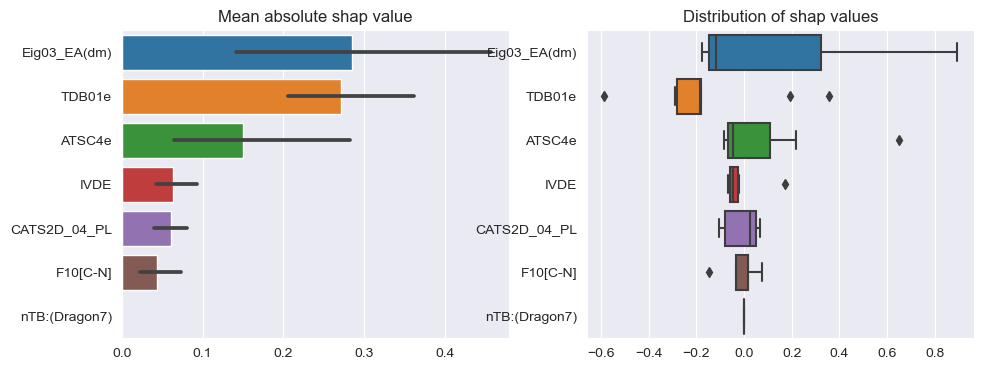

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

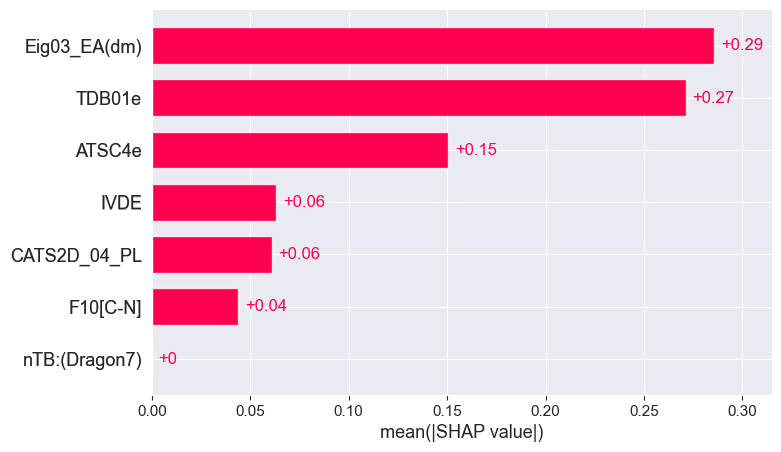

In [49]:
shap.plots.bar(shap_test)

In [52]:
import shap
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть обученная модель, X_test и shap_values

# Создаем фигуру
plt.figure()

# Построение SHAP summary plot
shap.summary_plot(shap_test, X_test, show=False)  # Убедитесь, что show=False

# Сохранение графика в PDF
plt.savefig('Toluene_RFR_SHAP_test_plot.pdf', format='pdf')

# Если необходимо закрыть окно с графиком после сохранения
plt.close()